# Imports

In [1]:
!pip install --upgrade pyalgotrading

In [2]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [3]:
connection = AlgoBullsConnection()

In [4]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [5]:
API_TOKEN = "c3477e22990b004e542ac6eaee59d3cc961816f5"
connection.set_access_token(API_TOKEN)

Access token is valid.


# Strategy Creation

## Import Strategy from pyaglostrategypool

In [6]:
! wget -O options_box_spread.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/options_box_spread/_strategy.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' options_box_spread.py

--2024-12-26 21:03:00--  https://raw.githubusercontent.com/Sriramg89/pyalgostrategypool/master/pyalgostrategypool/options_box_spread/_strategy.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6116 (6.0K) [text/plain]
Saving to: 'options_box_spread.py'

options_box_spread. 100%[===================>]   5.97K  --.-KB/s    in 0s      

2024-12-26 21:03:01 (56.6 MB/s) - 'options_box_spread.py' saved [6116/6116]

sed: 1: "options_box_spread.py": invalid command code o


In [7]:
from options_box_spread import OptionsBoxSpread as strategy_cls

In [8]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 160105,
 'strategyId': 'c264033572fc423098c0e3aac739babb'}

In [9]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [10]:
instrument = connection.search_instrument('NIFTY 50', exchange='NSE')
instrument

[{'id': 61576, 'value': 'NSE:NIFTY 50'}]

## Setup Parameters

In [11]:
parameters = {
    # Leg 1 (Long Call)
    'LEG_ONE_NUMBER_OF_STRIKES': 0,              # Number of strikes offset (0 means at-the-money)
    'LEG_ONE_STRIKE_DIRECTION': 0,                # Strike direction (ITM)
    'LEG_ONE_TRADING_SYMBOL_SUFFIX': 1,           # Call Option (CE)
    'LEG_ONE_TRANSACTION_TYPE': 1,                # BUY

    # Leg 2 (Short Call)
    'LEG_TWO_NUMBER_OF_STRIKES': 2,               # Number of strikes offset (1 means out-of-the-money)
    'LEG_TWO_STRIKE_DIRECTION': 2,                # Strike direction (OTM)
    'LEG_TWO_TRADING_SYMBOL_SUFFIX': 1,           # Call Option (CE)
    'LEG_TWO_TRANSACTION_TYPE': 2,                # SELL

    # Leg 3 (Long Put)
    'LEG_THREE_NUMBER_OF_STRIKES': 2,             # Number of strikes offset (same as Leg 2)
    'LEG_THREE_STRIKE_DIRECTION': 0,              # Strike direction (OTM)
    'LEG_THREE_TRADING_SYMBOL_SUFFIX': 2,         # Put Option (PE)
    'LEG_THREE_TRANSACTION_TYPE': 1,              # BUY

    # Leg 4 (Short Put)
    'LEG_FOUR_NUMBER_OF_STRIKES': 0,              # Same strike as Leg 1
    'LEG_FOUR_STRIKE_DIRECTION': 2,               # Strike direction (ATM)
    'LEG_FOUR_TRADING_SYMBOL_SUFFIX': 2,          # Put Option (PE)
    'LEG_FOUR_TRANSACTION_TYPE': 2,               # SELL
}

In [12]:
initial_virtual_funds = 1500000     # in Rupees

## Backtesting

### Start

In [13]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 +0530', 
    end='2022-07-31 15:30 +0530',  
    instrument='NSE:NIFTY BANK', 
    lots=5,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds

)


Starting the strategy 'Options Box Spread' in BACKTESTING mode...
╒═════════════════════════╤════════════════════════════════════════╕
│ Config                  │ Value                                  │
╞═════════════════════════╪════════════════════════════════════════╡
│ Strategy Name           │ Options Box Spread                     │
├─────────────────────────┼────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                            │
├─────────────────────────┼────────────────────────────────────────┤
│ Instrument(s)           │ ['NSE:NIFTY BANK']                     │
├─────────────────────────┼────────────────────────────────────────┤
│ Quantity/Lots           │ 5                                      │
├─────────────────────────┼────────────────────────────────────────┤
│ Start Timestamp         │ 2021-08-01 09:15:00+05:30              │
├─────────────────────────┼────────────────────────────────────────┤
│ End Timestamp           │ 2022-07-

### Status

In [14]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [15]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (3)

In [16]:
print(logs)

[2024-12-26 21:03:31] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2024-12-26 21:03:31] Sanity checks on cfg successful.
[2024-12-26 21:03:31] Currency set to "INR"
[2024-12-26 21:03:31] Setting up broker connection...
[2024-12-26 21:03:32] Broker connection has been setup successfully.
[2024-12-26 21:03:32] (NSE_IDX) Funds available in client's ABVIRTUALBROKER account is : INR '1500000.00'
[2024-12-26 21:03:32] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2024-12-26 21:03:32] Welcome ALGOBULLS VIRTUAL USER!
[2024-12-26 21:03:32] Reading strategy...
[2024-12-26 21:03:32] Important: This class will be deprecated in future. Use StrategyOptionsBase class directly for all new strategies, irrespective of market type
[2024-12-26 21:03:32] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [t

### Stop

In [17]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


### Profit and Loss Reports

In [18]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy,country='India')
pnl_reports

instrument_segment instrument_tradingsymbol           entry_timestamp  \
0                  NFO  BANKNIFTY05AUG2134600PE 2021-08-01 09:15:00+05:30   
1                  NFO  BANKNIFTY05AUG2134800PE 2021-08-01 09:15:00+05:30   
2                  NFO  BANKNIFTY05AUG2134800CE 2021-08-01 09:15:00+05:30   
3                  NFO  BANKNIFTY05AUG2134600CE 2021-08-01 09:15:00+05:30   
4                  NFO  BANKNIFTY05AUG2134800PE 2021-08-02 09:15:00+05:30   
5                  NFO  BANKNIFTY05AUG2135000PE 2021-08-02 09:15:00+05:30   
6                  NFO  BANKNIFTY05AUG2135000CE 2021-08-02 09:15:00+05:30   
7                  NFO  BANKNIFTY05AUG2134800CE 2021-08-02 09:15:00+05:30   
8                  NFO  BANKNIFTY05AUG2134700PE 2021-08-03 09:15:00+05:30   
9                  NFO  BANKNIFTY05AUG2134900PE 2021-08-03 09:15:00+05:30   
10                 NFO  BANKNIFTY05AUG2134900CE 2021-08-03 09:15:00+05:30   
11                 NFO  BANKNIFTY05AUG2134700CE 2021-08-03 09:15:00+05:30   
12                 NFO  BANKNIFTY05AUG2135400PE 2021-08-04 09:15:00+05:30   
13                 NFO  BANKNIFTY05AUG2135600PE 2021-08-04 09:15:00+05:30   
14                 NFO  BANKNIFTY05AUG2135600CE 2021-08-04 09:15:00+05:30   
15                 NFO  BANKNIFTY05AUG2135400CE 2021-08-04 09:15:00+05:30   
16                 NFO  BANKNIFTY05AUG2136100PE 2021-08-05 09:15:00+05:30   
17                 NFO  BANKNIFTY05AUG2136300PE 2021-08-05 09:15:00+05:30   
18                 NFO  BANKNIFTY05AUG2136300CE 2021-08-05 09:15:00+05:30   
19                 NFO  BANKNIFTY05AUG2136100CE 2021-08-05 09:15:00+05:30   
20                 NFO  BANKNIFTY12AUG2135900PE 2021-08-06 09:15:00+05:30   
21                 NFO  BANKNIFTY12AUG2136100PE 2021-08-06 09:15:00+05:30   
22                 NFO  BANKNIFTY12AUG2136100CE 2021-08-06 09:15:00+05:30   
23                 NFO  BANKNIFTY12AUG2135900CE 2021-08-06 09:15:00+05:30   
24                 NFO  BANKNIFTY12AUG2135800PE 2021-08-09 09:15:00+05:30   
25                 NFO  BANKNIFTY12AUG2136000PE 2021-08-09 09:15:00+05:30   
26                 NFO  BANKNIFTY12AUG2136000CE 2021-08-09 09:15:00+05:30   
27                 NFO  BANKNIFTY12AUG2135800CE 2021-08-09 09:15:00+05:30   
28                 NFO  BANKNIFTY12AUG2136000PE 2021-08-10 09:15:00+05:30   
29                 NFO  BANKNIFTY12AUG2136200PE 2021-08-10 09:15:00+05:30   
30                 NFO  BANKNIFTY12AUG2136200CE 2021-08-10 09:15:00+05:30   
31                 NFO  BANKNIFTY12AUG2136000CE 2021-08-10 09:15:00+05:30   
32                 NFO  BANKNIFTY12AUG2136200PE 2021-08-11 09:15:00+05:30   
33                 NFO  BANKNIFTY12AUG2136400PE 2021-08-11 09:15:00+05:30   
34                 NFO  BANKNIFTY12AUG2136400CE 2021-08-11 09:15:00+05:30   
35                 NFO  BANKNIFTY12AUG2136200CE 2021-08-11 09:15:00+05:30   
36                 NFO  BANKNIFTY12AUG2135800PE 2021-08-12 09:15:00+05:30   
37                 NFO  BANKNIFTY12AUG2136000PE 2021-08-12 09:15:00+05:30   
38                 NFO  BANKNIFTY12AUG2136000CE 2021-08-12 09:15:00+05:30   
39                 NFO  BANKNIFTY12AUG2135800CE 2021-08-12 09:15:00+05:30   
40                 NFO  BANKNIFTY18AUG2136000PE 2021-08-13 09:15:00+05:30   
41                 NFO  BANKNIFTY18AUG2136200PE 2021-08-13 09:15:00+05:30   
42                 NFO  BANKNIFTY18AUG2136200CE 2021-08-13 09:15:00+05:30   
43                 NFO  BANKNIFTY18AUG2136000CE 2021-08-13 09:15:00+05:30   
44                 NFO  BANKNIFTY18AUG2136100PE 2021-08-16 09:15:00+05:30   
45                 NFO  BANKNIFTY18AUG2136300PE 2021-08-16 09:15:00+05:30   
46                 NFO  BANKNIFTY18AUG2136300CE 2021-08-16 09:15:00+05:30   
47                 NFO  BANKNIFTY18AUG2136100CE 2021-08-16 09:15:00+05:30   
48                 NFO  BANKNIFTY18AUG2135900PE 2021-08-17 09:15:00+05:30   
49                 NFO  BANKNIFTY18AUG2136100PE 2021-08-17 09:15:00+05:30   
50                 NFO  BANKNIFTY18AUG2136100CE 2021-08-17 09:15:00+05:30   


### Statistics Reports

#### Statistics

In [19]:
connection.get_backtesting_report_statistics(strategy, initial_funds=initial_virtual_funds)

Generating Statistics for already fetched P&L data...


/Users/sriram/anaconda3/lib/python3.9/site-packages/pyalgotrading/algobulls/connection.py:622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info
/Users/sriram/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)


                    Strategy
------------------  -----------------------
Start Period        2021-08-01
End Period          2022-07-29
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   -
CAGR﹪              9.82%

Sharpe              0.67
Prob. Sharpe Ratio  74.9%
Sortino             1.0
Sortino/√2          0.71
Omega               1.12

Max Drawdown        -7.71%
Longest DD Days     105

Gain/Pain Ratio     0.12
Gain/Pain (1M)      4.44

Payoff Ratio        1.07
Profit Factor       -
Common Sense Ratio  1.06
CPC Index           0.62
Tail Ratio          1.16
Outlier Win Ratio   1.09
Outlier Loss Ratio  -

MTD                 9.836028145913232e+132%
3M                  -
6M                  -
YTD                 -
1Y                  -
3Y (ann.)           9.82%
5Y (ann.)           9.82%
10Y (ann.)          9.82%
All-time (ann.)     9.82%

Avg. Drawdown       -2.46%
Avg. Drawdown Days  10
Recovery Factor     2.14
Ulcer Index         0.02
Serenity Index      3.425374

/Users/sriram/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
/Users/sriram/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
/Users/sriram/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
/Users/sriram/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)


#### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/Users/sriram/anaconda3/lib/python3.9/site-packages/pyalgotrading/algobulls/connection.py:622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-01
End Period                 2022-07-29
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          14.41%
CAGR﹪                     9.82%

Sharpe                     0.67
Prob. Sharpe Ratio         74.81%
Smart Sharpe               0.44
Sortino                    1.0
Smart Sortino              0.66
Sortino/√2                 0.71
Smart Sortino/√2           0.47
Omega                      1.12

Max Drawdown               -7.71%
Longest DD Days            105
Volatility (ann.)          24.9%
Calmar                     1.27
Skew                       0.21
Kurtosis                   1.94

Expected Daily %           0.05%
Expected Monthly %         1.13%
Expected Yearly %          6.96%
Kelly Criterion            5.61%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.51%
Expected Shortfall (cVaR)  -2.51%

Max Consecutive Wins       4
M

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2021-11-02  2022-01-28  2022-02-14   105     -7.706302         -6.215144
2  2021-10-22  2021-10-28  2021-10-29     8     -6.539338         -1.588867
3  2022-02-16  2022-02-23  2022-02-24     9     -5.456817         -4.913183
4  2022-05-04  2022-05-04  2022-05-06     3     -4.167299         -1.999679
5  2022-06-15  2022-06-16  2022-06-16     2     -3.817285         -0.137238

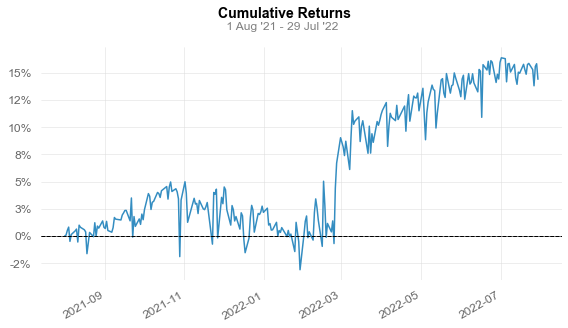

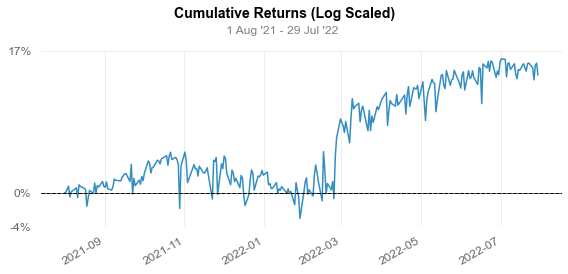

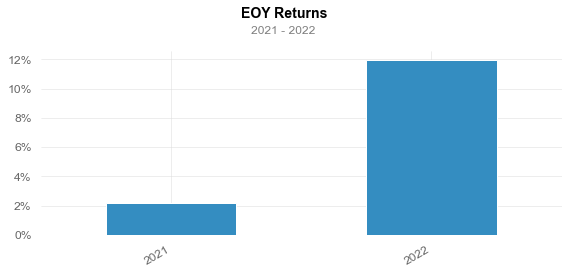

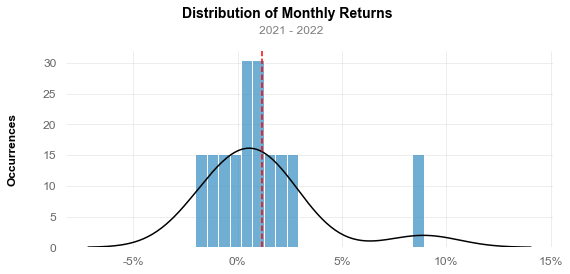

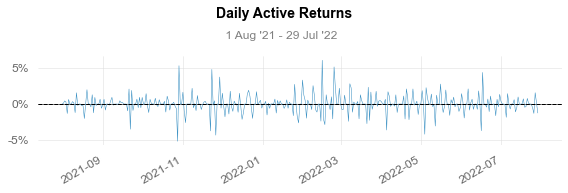

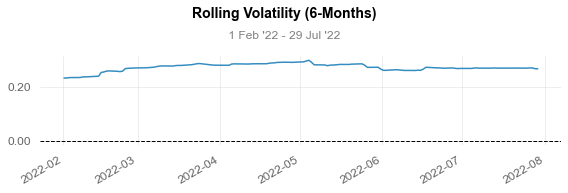

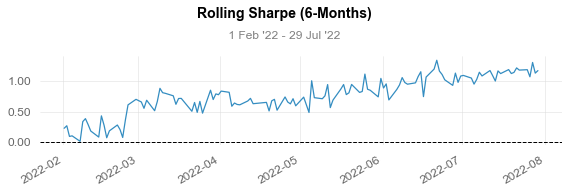

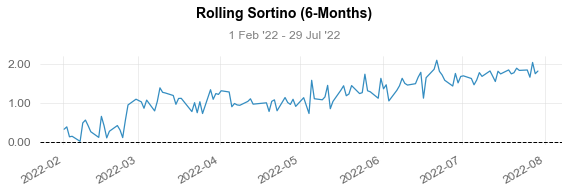

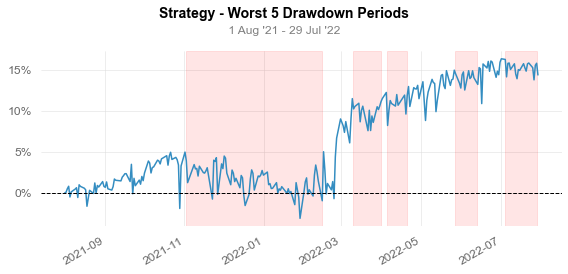

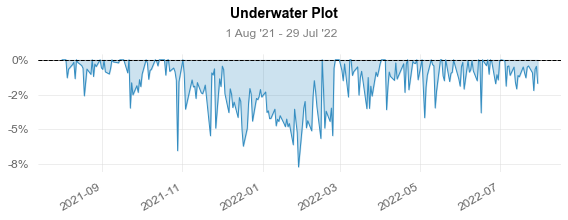

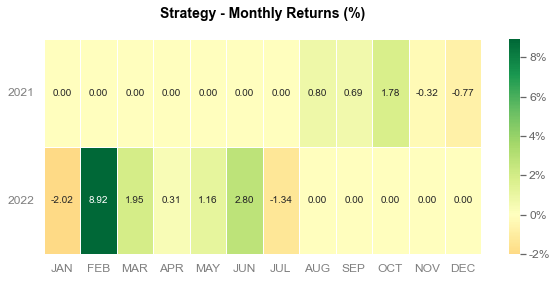

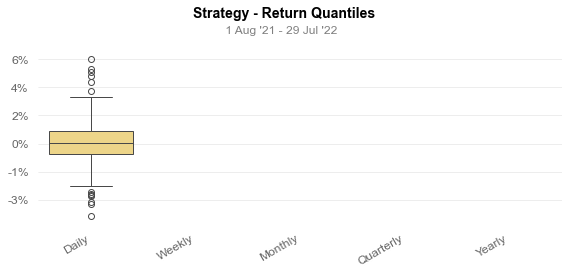

In [20]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=False, initial_funds=initial_virtual_funds)

### Order History

In [21]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | 6d767191f71944b2bcf31c69c4341123 |
| Transaction Type | BUY                              |
| Instrument       | NSE:BANKNIFTY04AUG2237700PE      |
| Quantity         | 75                               |
| Price            | ₹420.5                           |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2024-12-26T15:36:23.704504Z | COMPLETE               |
| 2024-12-26T15:36:23.704486Z | OPEN                   |
| 2024-12-26T15:36:23.704467Z | OPEN PENDING           |
| 2024-12-26T15:36:23.704444Z | VALIDATION PENDING     |
| 2024-12-26T15:36:23.704397Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | 4b8645685fe040fa8

---

## Papertrading

### Start

In [67]:
connection.papertrade(
    strategy=strategy, 
    start='09:15 +0530', 
    end='15:00 +0530',  
    instruments='NSE:NIFTY 50', 
    lots=5,
    parameters=parameters, 
    candle='15 minutes',
)


Starting the strategy 'Options Box Spread' in PAPERTRADING mode...
╒═════════════════════════╤════════════════════════════════════════╕
│ Config                  │ Value                                  │
╞═════════════════════════╪════════════════════════════════════════╡
│ Strategy Name           │ Options Box Spread                     │
├─────────────────────────┼────────────────────────────────────────┤
│ Trading Type            │ PAPERTRADING                           │
├─────────────────────────┼────────────────────────────────────────┤
│ Instrument(s)           │ ['NSE:NIFTY 50']                       │
├─────────────────────────┼────────────────────────────────────────┤
│ Quantity/Lots           │ 5                                      │
├─────────────────────────┼────────────────────────────────────────┤
│ Start Timestamp         │ 2024-12-26 09:15:00+05:30              │
├─────────────────────────┼────────────────────────────────────────┤
│ End Timestamp           │ 2024-12

### Status

In [68]:
connection.get_papertrading_job_status(strategy)

{'message': 'STARTED', 'status': 2}

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [26]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

Empty DataFrame
Columns: [instrument_segment, instrument_tradingsymbol, entry_timestamp, entry_transaction_type, entry_quantity, entry_currency, entry_price, entry_variety, exit_timestamp, exit_transaction_type, exit_quantity, exit_currency, exit_price, exit_variety, pnl_absolute, net_pnl]
Index: []

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Paper Trading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

---

## Live Trading (Real Trading)

### Start

In [ ]:
connection.realtrade(
    strategy=strategy, 
    start='8:00 +0530', 
    end='15:00 +0530', 
    instruments='NSE:SBIN', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    broking_id=73,
    broking_details=broking_details
)

### Status

In [ ]:
connection.get_realtrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_realtrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_realtrading_job(strategy)

### Profit and Loss Reports (Live Trading)

In [ ]:
pnl_reports = connection.get_realtrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Live Trading)

#### Statistics

In [ ]:
connection.get_realtrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_realtrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)